# Chapter 18: An Introduction to Graph Theory and Network Analysis

## 18.1 Using Basic Graph Theory to Rank Websites by Popularity

In [67]:
# Defining a node list
nodes = ['NumPy', 'SciPy']

In [68]:
# Defining an edge list
edges = [(1, 0)]

In [69]:
# Checking for the existence of an edge
def edge_exists(i, j): return (i, j) in edges

assert edge_exists(1, 0)
assert not edge_exists(0, 1)

In [70]:
# Adjacency Matrix: A table containing the presence or absence of each edge (i, j) in the ith row and jth column; each t[i][j] = edge_exists(i, j)
# Tracking nodes and edges using a matrix
import numpy as np
adjacency_matrix = np.zeros((len(nodes), len(nodes)))
for i, j in edges:
    adjacency_matrix[i][j] = 1

assert adjacency_matrix[1][0]
assert not adjacency_matrix[0][1]

print(adjacency_matrix)

[[0. 0.]
 [1. 0.]]


In [71]:
# Adding an edge to the adjacency matrix
adjacency_matrix[0][1] = 1
print(adjacency_matrix)

[[0. 1.]
 [1. 0.]]


In [72]:
# Importing the NetworkX library
import networkx as nx

In [73]:
# Initializing a directed graph object
G = nx.DiGraph()

In [74]:
# Adding a single node to a graph object
G.add_node(0)
print(nx.to_numpy_array(G))

[[0.]]


In [75]:
# Adding an attribute to an existing node
def print_node_attributes():
    for i in G.nodes:
        print(f"The attribute dictionary at node {i} is {G.nodes[i]}")

print_node_attributes()
G.nodes[0]['webpage'] = 'NumPy'
print("\nWe've added a webpage to node 0")
print_node_attributes()

The attribute dictionary at node 0 is {}

We've added a webpage to node 0
The attribute dictionary at node 0 is {'webpage': 'NumPy'}


In [76]:
# Adding a node with an attribute
G.add_node(1, webpage='SciPy')
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'NumPy'}
The attribute dictionary at node 1 is {'webpage': 'SciPy'}


In [77]:
# Outputting nodes together with their attributes
print(G.nodes(data=True))

[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'})]


In [78]:
# add_edge(i, j) creates an edge from i to j
# Adding a singe edge to a graph object
G.add_edge(1, 0)
print(nx.to_numpy_array(G))

[[0. 0.]
 [1. 0.]]


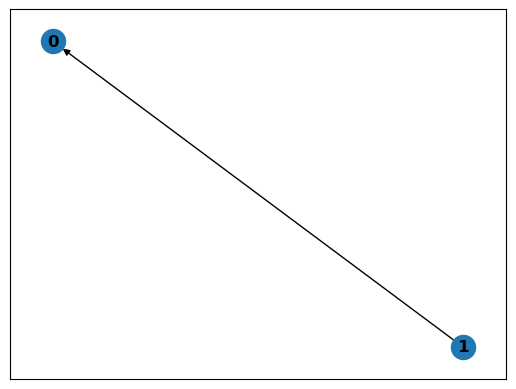

In [79]:
# Plotting a graph object
import matplotlib.pyplot as plt
np.random.seed(0)
nx.draw_networkx(G)
plt.show()

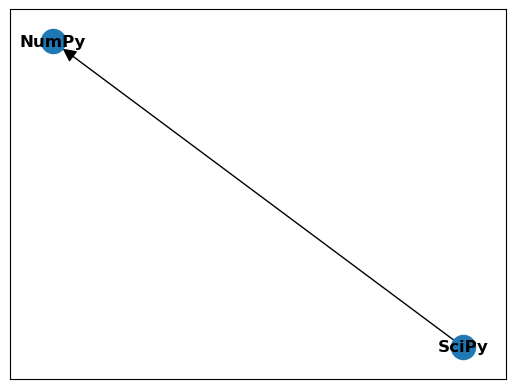

In [80]:
# Tweaking the graph visualization
np.random.seed(0)
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}
nx.draw_networkx(G, labels=labels, arrowsize=20)
plt.show()

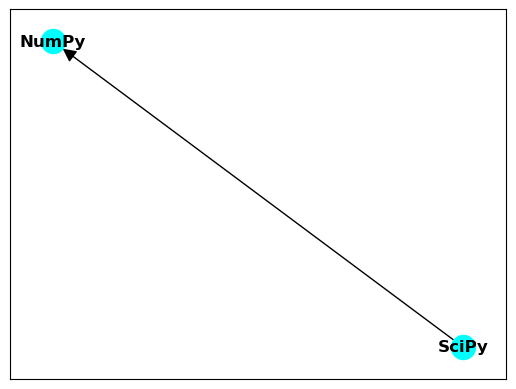

In [81]:
# Altering the node color
np.random.seed(0)
nx.draw_networkx(G, labels=labels, node_color='cyan', arrowsize=20)
plt.show()

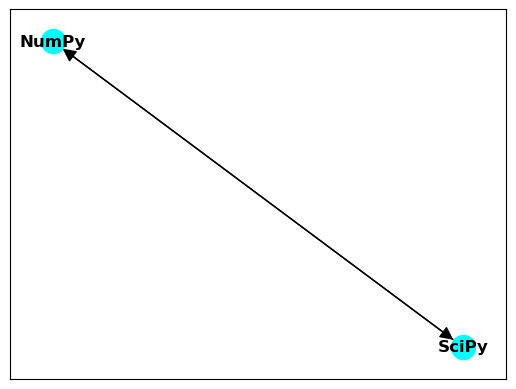

In [82]:
# Adding a backlink between webpages
np.random.seed(0)
G.add_edge(0, 1)
nx.draw_networkx(G, labels=labels, node_color='cyan', arrowsize=20)
plt.show()

In [83]:
# Adding multiple nodes to a graph object
webpages = ['Pandas', 'Matplotlib']
new_nodes = [(i, {'webpage': webpage}) for i, webpage in enumerate(webpages, 2)]
G.add_nodes_from(new_nodes)

print(f"We've added these nodes to our graph:\n{new_nodes}")
print('\nOur updated list of nodes is:')
print(G.nodes(data=True))

We've added these nodes to our graph:
[(2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]

Our updated list of nodes is:
[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'}), (2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]


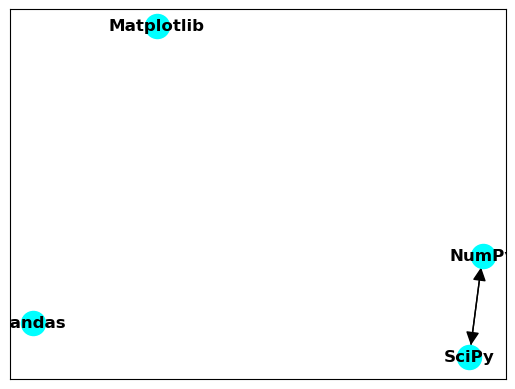

In [84]:
# Plotting the updated four-node graph
np.random.seed(0)
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}
nx.draw_networkx(G, labels=labels, node_color='cyan', arrowsize=20)
plt.show()

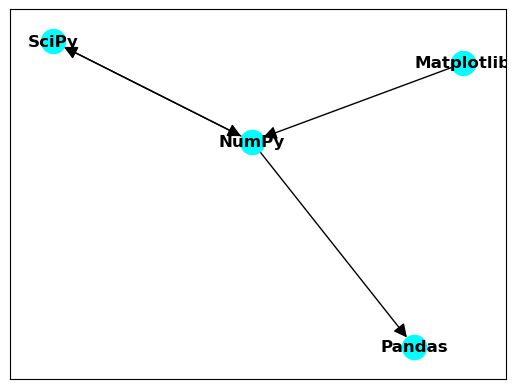

In [85]:
# Adding multiple edges to a graph object
np.random.seed(1)
G.add_edges_from([(0, 2), (3, 0)])
nx.draw_networkx(G, labels=labels, node_color='cyan', arrowsize=20)
plt.show()

In [86]:
# In-degree: The number of inbound edges pointing toward a site; the sum of a site's column
# Out-degree: The number of outbound edges away from a site; the sum of a site's row
# Printing the updated adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)
print(adjacency_matrix)

[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [87]:
# Computing in-degrees using the adjacency matrix
in_degrees = adjacency_matrix.sum(axis=0)
for i, in_degree in enumerate(in_degrees):
    page = G.nodes[i]['webpage']
    print(f"{page} has an in-degree of {in_degree}")

top_page = G.nodes[in_degrees.argmax()]['webpage']
print(f"\n{top_page} is the most popular page.")

NumPy has an in-degree of 2.0
SciPy has an in-degree of 1.0
Pandas has an in-degree of 1.0
Matplotlib has an in-degree of 0.0

NumPy is the most popular page.


In [88]:
# Computing in-degrees using NetworkX
assert G.in_degree(0) == 2

In [89]:
# Using strings as node IDs in a graph
G2 = nx.DiGraph()
G2.add_nodes_from(['NumPy', 'SciPy', 'Matplotlib', 'Pandas'])
G2.add_edges_from([('SciPy', 'NumPy'), ('SciPy', 'NumPy'), ('NumPy', 'Pandas'), ('Matplotlib', 'NumPy')])
assert G2.in_degree('NumPy') == 2

## 18.2 Utilizing Undirectd Graphs to Optimize the Travel Time Between Towns

In [90]:
# Creating a two-node undirected graph
G = nx.Graph()
G.add_edge(0, 1)
G[0][1]['travel_time'] = 20

In [91]:
# Checking the edge attribute of a graph
for i, j in [(0, 1), (1, 0)]:
    travel_time = G[i][j]['travel_time']
    print(f"It takes {travel_time} minutes to drive from Town {i} to Town {j}")

It takes 20 minutes to drive from Town 0 to Town 1
It takes 20 minutes to drive from Town 1 to Town 0


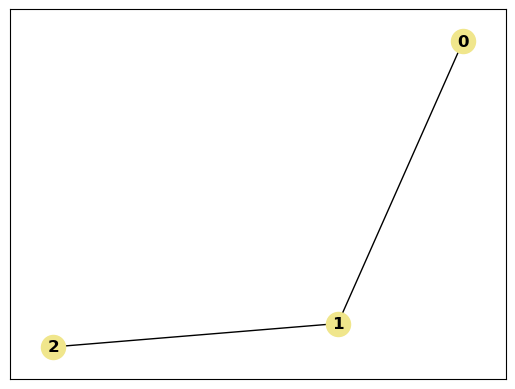

In [92]:
# Visualizing a path betweeen multiple towns
np.random.seed(0)
G.add_edge(1, 2, travel_time=15)
nx.draw_networkx(G, with_labels=True, node_color='khaki')
plt.show()

In [93]:
# Computing the travel time betweeen towns
travel_time = sum(G[i][1]['travel_time'] for i in [0, 2])
print(f"It takes {travel_time} minutes to drive from Town 0 to Town 2.")

It takes 35 minutes to drive from Town 0 to Town 2.


### 18.2.1 Modeling a Complex Network of Towns and Countries
Assumptions:  
* Our towns are located in 6 different countries
* Each country contains 3 to 10 arrows
* 90% of the towns in a single country are directly connected by roads. The average travel time on a country road is 20 mins
* 5% of the towns across different countries are directly connected by a road. The average travel time on an intra-country road is 45 mins

In [94]:
# Modeling five towns in the same country
G = nx.Graph()
G.add_nodes_from([(i, {'country_id': 0}) for i in range(5)])

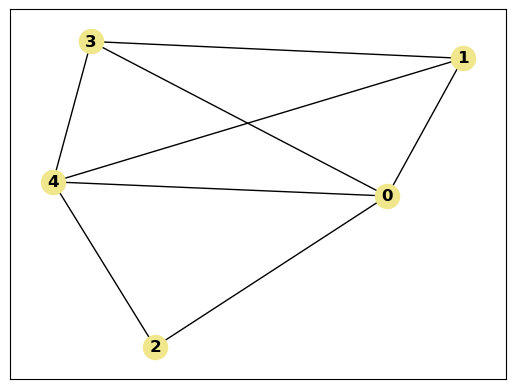

In [95]:
# Modeling random intra-country roads
import numpy as np
np.random.seed(0)

def add_random_edge(G, node1, node2, prob_road=0.9, mean_drive_time=20):
    if np.random.binomial(1, prob_road):
        drive_time = np.random.normal(mean_drive_time)
        G.add_edge(node1, node2, travel_time=round(drive_time, 2))

nodes = list(G.nodes())
for node1 in nodes[:-1]:
    for node2 in nodes[node1 + 1:]:
        add_random_edge(G, node1, node2)

nx.draw_networkx(G, with_labels=True, node_color='khaki')
plt.show()


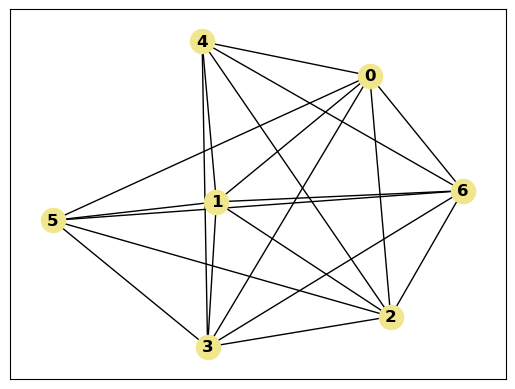

In [96]:
# Modeling a second random country
np.random.seed(0)
def random_country(country_id):
    numTowns = np.random.randint(3, 10)
    G = nx.Graph()
    nodes = [(node_id, {'country_id': country_id}) for node_id in range(numTowns)]
    G.add_nodes_from(nodes)
    for node1, _ in nodes[:-1]:
        for node2, _ in nodes[node1 + 1:]:
            add_random_edge(G, node1, node2)

    return G

G2 = random_country(1)
nx.draw_networkx(G2, with_labels=True, node_color='khaki')
plt.show()

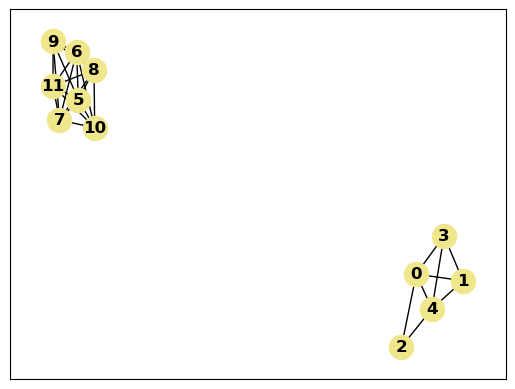

In [97]:
# Merging two separate graphs
np.random.seed(0)
G = nx.disjoint_union(G, G2)
nx.draw_networkx(G, with_labels=True, node_color='khaki')
plt.show()

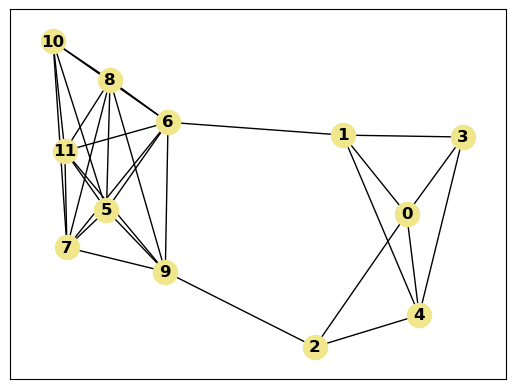

In [98]:
# Adding random inter-country roads 
np.random.seed(0)
def add_intercountry_edges(G):
    nodes = list(G.nodes(data=True))
    for node1, attributes1 in nodes[:-1]:
        country1 = attributes1['country_id']
        for node2, attributes2 in nodes[node1:]:
            if country1 != attributes2['country_id']:
                add_random_edge(G, node1, node2, prob_road=0.05, mean_drive_time=45)
    
    return G

G = add_intercountry_edges(G)
np.random.seed(0)
nx.draw_networkx(G, with_labels=True, node_color='khaki')

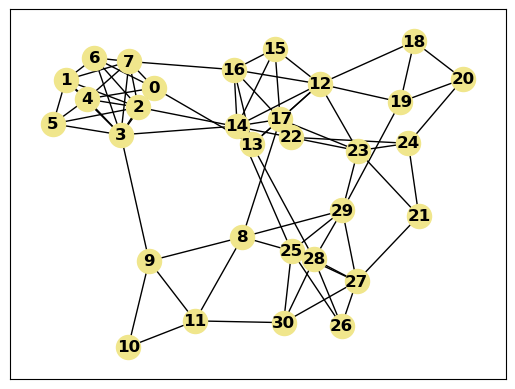

In [99]:
# Simulating six interconnected countries
np.random.seed(1)
G = random_country(0)
for country_id in range(1, 6):
    G2 = random_country(country_id)
    G = nx.disjoint_union(G, G2)

G = add_intercountry_edges(G)
np.random.seed(1)
nx.draw_networkx(G, with_labels=True, node_color='khaki')
plt.show()

<class 'int'>


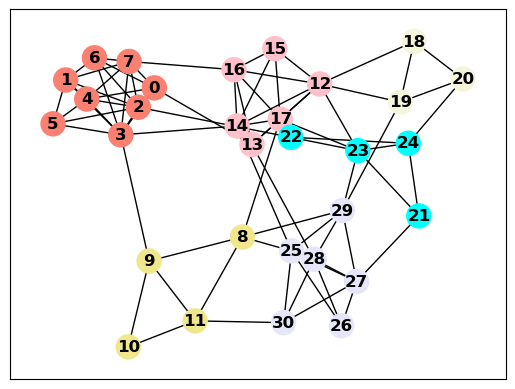

In [100]:
# Coloring nodes by country
np.random.seed(1)
country_colors = ['salmon', 'khaki', 'pink', 'beige', 'cyan', 'lavender']
country_ids = [G.nodes[n]['country_id'] for n in G.nodes]
print(type(country_ids[0]))
node_colors = [country_colors[id_] for id_ in country_ids]
nx.draw_networkx(G, with_labels=True, node_color=node_colors)
plt.show()

### 18.2.2 Computing the Fastest Travel Time Between Nodes

In [101]:
# Tracking the fastest-known travel times
fastest_times = {0: 0}

In [102]:
# Accessing the neighbors of Town 0
neighbors = list(G.neighbors(0))
assert list(neighbors) == list(G[0])
print(f"The following towns connect directly with Town 0:\n{neighbors}")

The following towns connect directly with Town 0:
[3, 4, 6, 7, 13]


In [103]:
# Tracking the travel times to neighboring towns
time_to_neighbor = {n: G[0][n]['travel_time'] for n in neighbors}
fastest_times.update(time_to_neighbor)
for neighbor, travel_time in sorted(time_to_neighbor.items(), key=lambda x: x[1]):
    print(f"It takes {travel_time} minutes to drive from Town 0 to Town {neighbor}.")

It takes 18.04 minutes to drive from Town 0 to Town 7.
It takes 18.4 minutes to drive from Town 0 to Town 3.
It takes 18.52 minutes to drive from Town 0 to Town 4.
It takes 20.26 minutes to drive from Town 0 to Town 6.
It takes 44.75 minutes to drive from Town 0 to Town 13.


In [104]:
# Searching for faster detours through Town 7
def examine_detour(town_id):
    detour_found = False

    travel_time = fastest_times[town_id]
    for n in G[town_id]:
        detour_time = travel_time + G[town_id][n]['travel_time']
        if n in fastest_times:
            if detour_time < fastest_times[n]:
                detour_found = True
                print(f"A detour through Town {town_id} reduces travel-time to Town {n} from {fastest_times[n]:.2f} to {detour_time:.2f} minutes.")
                fastest_times[n] = detour_time
        else:
            fastest_times[n] = detour_time

    return detour_found

if not examine_detour(7):
    print("No detours were found.")

addedTowns = len(fastest_times) - 6
print(f"We've computed travel-times to {addedTowns} additional towns.")

No detours were found.
We've computed travel-times to 3 additional towns.


In [105]:
# Selecting an alternative detour candidate
candidate_pool = set(G[0]) | set(G[7])
examinedTowns = {0, 7}
unexaminedTowns = candidate_pool - examinedTowns
detour_candidate = min(unexaminedTowns, key=lambda x: fastest_times[x])
travel_time = fastest_times[detour_candidate]
print(f"Our next detour candidate is Town {detour_candidate}, which is located {travel_time} minutes from Town 0.")

Our next detour candidate is Town 3, which is located 18.4 minutes from Town 0.


In [106]:
# Searching for faster detours through Town 3
if not examine_detour(detour_candidate):
    print("No detours were found.")

def new_neighbors(town_id):
    return set(G[town_id]) - examinedTowns

def shift_to_examined(town_id):
    unexaminedTowns.remove(town_id)
    examinedTowns.add(town_id)

unexaminedTowns.update(new_neighbors(detour_candidate))
shift_to_examined(detour_candidate)
num_candidates = len(unexaminedTowns)
print(f"{num_candidates} detour candidates remain.")

No detours were found.
9 detour candidates remain.


In [107]:
# Examining every town for faster detours
while unexaminedTowns:
    detour_candidate = min(unexaminedTowns, key=lambda x: fastest_times[x])
    examine_detour(detour_candidate)
    shift_to_examined(detour_candidate)
    unexaminedTowns.update(new_neighbors(detour_candidate))

A detour through Town 14 reduces travel-time to Town 15 from 83.25 to 82.27 minutes.
A detour through Town 22 reduces travel-time to Town 23 from 111.21 to 102.38 minutes.
A detour through Town 28 reduces travel-time to Town 29 from 127.60 to 108.46 minutes.
A detour through Town 28 reduces travel-time to Town 30 from 126.46 to 109.61 minutes.
A detour through Town 19 reduces travel-time to Town 20 from 148.03 to 131.23 minutes.


In [108]:
# Counting all the towns within a two-hour driving range
closeTowns = {town for town, drive_time in fastest_times.items() if drive_time <= 2 * 60}
num_closeTowns = len(closeTowns)
totalTowns = len(G.nodes)
print(f"{num_closeTowns} of our {totalTowns} towns are withing two hours of our brewery.")

29 of our 31 towns are withing two hours of our brewery.


In [109]:
# Computing the shortest path lenghts with NetworkX
shortest_lengths = nx.shortest_path_length(G, weight='travel_time', source=0)
for town, path_length in shortest_lengths.items():
    assert fastest_times[town] == path_length

In [112]:
# Computing shortest paths with NetworkX
shortest_path = nx.shortest_path(G, weight='travel_time', source=0)[30]
print(shortest_path)

[0, 13, 28, 30]


In [113]:
# Verifying the length of a shortest path
travel_time = 0
for i, town_a in enumerate(shortest_path[:-1]):
    town_b = shortest_path[i + 1]
    travel_time += G[town_a][town_b]['travel_time']

print(f"The fastesst travel time between Town 0 and Twon 30 is {travel_time} minutes.")
assert travel_time == fastest_times[30]

The fastesst travel time between Town 0 and Twon 30 is 109.61 minutes.


## Notes / Key Words:
* **Network Theory**: The study of connections between objects; a collection of these pobjects and their dirspersed connections is called either a **network** or **graph**; the objects are called **nodes** and the connections are **edges**
* **Directed Graph**: A graph where edges have direction
* **Undirected Graph**: A graph where edges have no direction
* **Adjacency Matrix**: Can represent a graph as a binary matrix *M*, where *M[i][j] = 1* if an edge exists between node i and node j
* **In-degree**: The number of inbound edges pointing toward a site; the sum of a site's column
* **Out-degree**: The number of outbound edges away from a site; the sum of a site's row
* **Path**: A sequence of node transitions
* **Edge Weight**: A length that can be associated with an edge to give it more significance
* **Path Length**: The total weights of each edge along a path
* **Shortest Path Length Problem**: Attempt to minimize the path lengths from node N to all other nodes in the graph; if the edge weights are positive, the path lengths can be minimized algorithmically